Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8653 - loss: 0.4654
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9842 - loss: 0.0519
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9890 - loss: 0.0365
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9924 - loss: 0.0250
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9934 - loss: 0.0207
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9944 - loss: 0.0164
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9954 - loss: 0.0140
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9967 - loss: 0.0100
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9972 - loss: 0.0082
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9972 - loss: 0.0091
313/313 - 2s - 7ms/step - accuracy: 0.9908 - loss: 0.0294
테스트 정확도: 0.9908


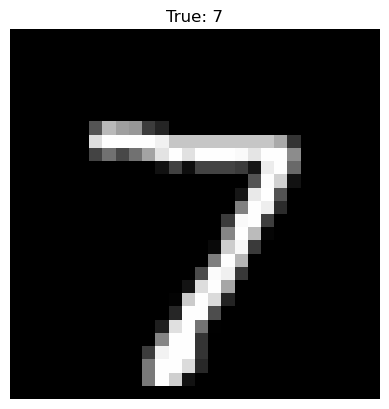

예측된 숫자: 7
실제 숫자: 7
예측 확률 분포: [[2.2621860e-09 2.4181240e-08 1.6573859e-08 1.3323942e-07 2.6548098e-06
  2.9270062e-09 8.0601850e-13 9.9999666e-01 1.4852384e-07 3.7822363e-07]]
예측 숫자의 확신도: 1.0000


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# ✅ MNIST 데이터셋 로드 및 정규화
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# ✅ CNN 모델 구성
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# ✅ 모델 컴파일 및 훈련
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128)

# ✅ 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"테스트 정확도: {test_acc:.4f}")

# ✅ 숫자 예측 함수 (정규화 중복 제거)
def predict_number(image):
    image = np.array(image).reshape(1, 28, 28, 1)  # ⚠️ 정규화 생략 (이미 정규화되어 있음)
    prediction = model.predict(image, verbose=0)
    predicted_label = np.argmax(prediction)
    return predicted_label, prediction

# ✅ 예제 테스트 (임의의 테스트 이미지 선택)
test_image = x_test[0]  # ⚠️ 이미 정규화되어 있음
true_label = y_test[0]

plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"True: {true_label}")
plt.axis('off')
plt.show()

predicted_number, prediction_probs = predict_number(test_image)
print(f"예측된 숫자: {predicted_number}")
print(f"실제 숫자: {true_label}")
print(f"예측 확률 분포: {prediction_probs}")
print(f"예측 숫자의 확신도: {prediction_probs[0][predicted_number]:.4f}")
